In [1]:
import pandas as pd
import numpy as np
import sys
import gc

import os
sys.path.append(os.path.abspath(".."))

In [2]:
import s3fs
from typing import List

from utils.common import *
from config.params import *
from preprocessing.transform import transform, tracking_transforming_input
from preprocessing.intervals import get_interval_from_transformed

In [3]:
from preprocessing.prepare_clustering_data import *

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [4]:
from training.models import *
from training.visualize import *

In [5]:
from pyarrow.dataset import field

In [6]:
import sagemaker
from sagemaker import get_execution_role

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# get the lastest saved data from mlflow run
import mlflow
from mlflow.tracking import MlflowClient

In [9]:
# from sklearn.cluster import KMeans
from datetime import datetime
from pathlib import Path

In [10]:
import sagemaker
import boto3
from sagemaker.estimator import Estimator
from sagemaker.inputs import TrainingInput

In [11]:
from io import StringIO

In [12]:
from sagemaker.model import Model
from sagemaker.transformer import Transformer

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
client = MlflowClient()

In [14]:
# Define session, role, and region so we can
# perform any SageMaker tasks we need
sagemaker_session = sagemaker.Session()
role = get_execution_role()
region = sagemaker_session.boto_region_name

In [15]:
# Provide the ARN of the tracking server that you want to track your training job with
tracking_server_arn = 'arn:aws:sagemaker:ap-southeast-1:771463264346:mlflow-tracking-server/mlflow-RCF-server'

In [16]:
mlflow.set_tracking_uri(tracking_server_arn)

In [17]:
experiment_name = "6. Model Inference"
mlflow.set_experiment(experiment_name)

2025/05/13 04:15:06 INFO mlflow.tracking.fluent: Experiment with name '6. Model Inference' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://s3-assetcare-bucket/mlflow_server/22', creation_time=1747109705980, experiment_id='22', last_update_time=1747109705980, lifecycle_stage='active', name='6. Model Inference', tags={}>

### functions

In [18]:
def get_value(run_id, keys):
    run = mlflow.get_run(run_id)

    # Lấy toàn bộ params
    params = run.data.params
    # print(params)
    
    # Lấy giá trị cụ thể, ví dụ: cluster_id
    filepath = [params.get(key) for key in keys]
    return filepath

### params

In [24]:
# date_folders = [
#     # '2024-04',
#     # '2024-05',
#     # '2024-06',
#     # '2024-07',
#     # '2024-08',
#     # '2024-09',
#     # '2024-10',
#     # '2024-11',
#     # '2024-12',
#     '2025-01',
#     '2025-02',
#     '2025-03'
# "2025-04"
# ]
# date_folders

In [25]:
# tag_name_digital = [
#     # 'DWA_INVERTER_RUNNING', 
#     # 'DWB_INVERTER_RUNNING', 
#     # 'DWC_INVERTER_RUNNING',
#     "TD_INVERTER_RUNNING"
# ]
# tag_name_digital

In [27]:
lst_run_id = [
    "f59b6687505b422f892d4dc4bcd968c4",
    "3308e10733c44199ac1666548fef6ade"
]

In [79]:
keys = [
    "Analog Tag name",
    "Cluster Nr",
    "Dataset: Output Training path",
    "Default Threshold"
]



In [80]:
# create df of params info
rows = []
for run_id in lst_run_id:
    values = get_value(run_id, keys)
    row = [run_id] + values
    rows.append(row)

# create df
columns = ["run_id"] + keys
df = pd.DataFrame(rows, columns=columns)

# filter not empty data
df = df[df["Dataset: Output Training path"].notna()]
df.head()

,run_id,Analog Tag name,Cluster Nr,Dataset: Output Training path,Default Threshold
0,f59b6687505b422f892d4dc4bcd968c4,DWA_DSU_DC_VOLTAGE,2,s3://s3-assetcare-bucket/features_store/evalua...,3
1,3308e10733c44199ac1666548fef6ade,DWA_DSU_DC_VOLTAGE,4,s3://s3-assetcare-bucket/features_store/evalua...,7


#### save file to edit the threshold

In [81]:
df.to_csv("inference_model_info", index=False)
df.shape

(2, 5)

In [83]:
# df.to_csv("inference_model_info.csv", index=False)

#### read the edited file

In [84]:
filepath = "inference_model_info"

In [85]:
df = pd.read_csv(filepath)
df.head()

,run_id,Analog Tag name,Cluster Nr,Dataset: Output Training path,Default Threshold
0,f59b6687505b422f892d4dc4bcd968c4,DWA_DSU_DC_VOLTAGE,2,s3://s3-assetcare-bucket/features_store/evalua...,2.5
1,3308e10733c44199ac1666548fef6ade,DWA_DSU_DC_VOLTAGE,4,s3://s3-assetcare-bucket/features_store/evalua...,6.0


### run

In [77]:
# threshold = 5

(5849, 5)
Precision: 0.000
Recall: 0.000
F1-score: 0.000


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


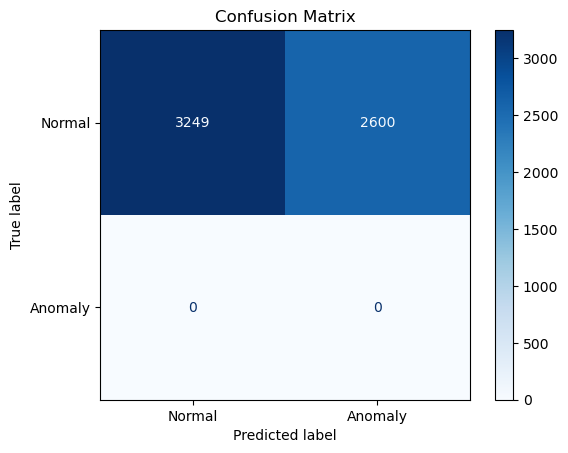

🏃 View run DWA_DSU_DC_VOLTAGE_cluster-2 at: https://ap-southeast-1.experiments.sagemaker.aws/#/experiments/22/runs/5516cacad91147f99be06711d0d4c03f
🧪 View experiment at: https://ap-southeast-1.experiments.sagemaker.aws/#/experiments/22
(46496, 5)
Precision: 0.000
Recall: 0.000
F1-score: 0.000


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 640x480 with 0 Axes>

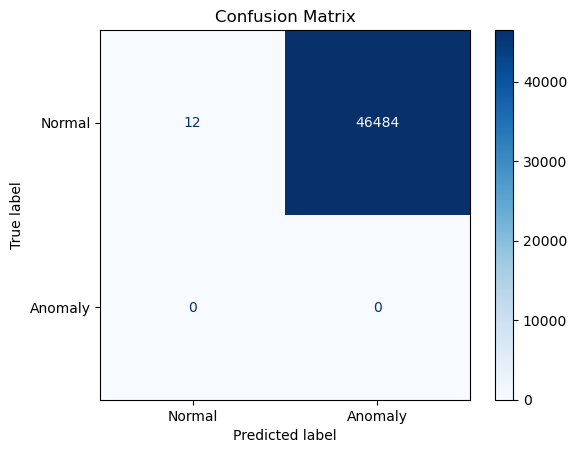

🏃 View run DWA_DSU_DC_VOLTAGE_cluster-4 at: https://ap-southeast-1.experiments.sagemaker.aws/#/experiments/22/runs/8db8713c1e73445082966426f428f89d
🧪 View experiment at: https://ap-southeast-1.experiments.sagemaker.aws/#/experiments/22


<Figure size 640x480 with 0 Axes>

In [87]:
for i in range(len(df)):
    output_trained_data = df.iloc[i]["Dataset: Output Training path"]
    edited_threshold = df.iloc[i]["Default Threshold"]
    tag_analog = df.iloc[i]["Analog Tag name"]
    cluster_nr = df.iloc[i]["Cluster Nr"]
    # print(output_trained_data)

    prefix = output_trained_data.replace("s3://", "").replace(bucket, "")[1:]
    lst_trained_data_files = list_files_in_s3_folder(bucket=bucket, prefix=prefix)
    # print(lst_trained_data_files)
    df_origin = load_csv_files([f"s3://{bucket}/{i}" for i in lst_trained_data_files])
    print(df_origin.shape)
    df_origin.columns = ['value', 'time_utc', 'anomaly_scores', 'tag_name', 'predictions']

    # calculate metrics
    # asume all values are not anomaly - means all rows data are labeled = False
    df_origin['final_result'] = False # merge result from user feedback and analytics users feedback
    df_origin['predictions'] = df_origin['anomaly_scores'] > edited_threshold

    precision = precision_score(df_origin['final_result'], df_origin['predictions'])
    recall = recall_score(df_origin['final_result'], df_origin['predictions'])
    f1 = f1_score(df_origin['final_result'], df_origin['predictions'])
    
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    
    cm = confusion_matrix(df_origin['final_result'], df_origin['predictions'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    with mlflow.start_run(run_name=f"{tag_analog}_cluster-{cluster_nr}"):
        mlflow.log_param("Analog Tag name", tag_analog)
        mlflow.log_param("Cluster Nr", cluster_nr)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("F1-score", f1)
        # mlflow.log_param("", )
        mlflow.log_figure(plt.gcf(), "plots/confusion_matrix.png")

    print("====================")


In [46]:
lst_trained_data_files = ['features_store/evaluation/DWA_DSU_DC_VOLTAGE_cluster-2_20250511_153236/part_0000.csv']

In [47]:
df_origin = load_csv_files([f"s3://{bucket}/{i}" for i in lst_trained_data_files])
df_origin.head()

,0,1,2,3,4
0,835.0,2025-03-01 01:45:22,2.234119,DWA_DSU_DC_VOLTAGE,False
1,835.0,2025-03-01 01:45:23,2.233711,DWA_DSU_DC_VOLTAGE,False
2,835.0,2025-03-01 01:45:24,2.232550,DWA_DSU_DC_VOLTAGE,False
3,835.0,2025-03-01 01:45:25,2.233230,DWA_DSU_DC_VOLTAGE,False
4,835.0,2025-03-01 01:45:26,2.234466,DWA_DSU_DC_VOLTAGE,False


In [48]:
df_origin.shape

(5849, 5)

In [59]:
df_origin.columns = ['value', 'time_utc', 'anomaly_scores', 'tag_name', 'predictions']
df_origin.head()

,value,time_utc,anomaly_scores,tag_name,predictions
0,823.0,2025-03-01 00:52:22,6.262795,DWA_DSU_DC_VOLTAGE,False
1,823.0,2025-03-01 00:52:23,6.262795,DWA_DSU_DC_VOLTAGE,False
2,823.0,2025-03-01 00:52:24,6.262795,DWA_DSU_DC_VOLTAGE,False
3,823.0,2025-03-01 00:52:25,6.262795,DWA_DSU_DC_VOLTAGE,False
4,823.0,2025-03-01 00:52:26,6.262795,DWA_DSU_DC_VOLTAGE,False


In [41]:
filepath = f"s3://{bucket}/features_store/evaluation/DWA_DSU_DC_VOLTAGE_cluster-2_20250511_153236/part_0000.csv"

In [44]:
df = pd.read_csv(filepath, header=None)
df.shape

(5849, 5)

In [45]:
df.head()

,0,1,2,3,4
0,835.0,2025-03-01 01:45:22,2.234119,DWA_DSU_DC_VOLTAGE,False
1,835.0,2025-03-01 01:45:23,2.233711,DWA_DSU_DC_VOLTAGE,False
2,835.0,2025-03-01 01:45:24,2.232550,DWA_DSU_DC_VOLTAGE,False
3,835.0,2025-03-01 01:45:25,2.233230,DWA_DSU_DC_VOLTAGE,False
4,835.0,2025-03-01 01:45:26,2.234466,DWA_DSU_DC_VOLTAGE,False
